<a href="https://colab.research.google.com/github/pcsilcan/da/blob/master/week10/FrequentItemsetsCondensed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install pyfim

In [0]:
# !pip install seaborn

In [0]:
from fim import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import time
import pandas as pd

In [32]:
help(eclat)

Help on built-in function eclat in module fim:

eclat(...)
    eclat (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
           eval='x', agg='x', thresh=10, prune=None, algo='a', mode='',
           border=None)
    Find frequent item sets with the Eclat algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an item set     

In [0]:
def leerDataset(nombre):
    archivo = open(nombre, 'r')
    dataset = []
    dataset1 = []
    for x in archivo:
        if "#" not in x:
            items = x.split(' ')
            dataset += [[int(j) for j in items[1:]]]
            if items[0] == '1':
                dataset1 += [[int(j) for j in items[1:]]]
    archivo.close()
    return dataset, dataset1

In [0]:
d, _ = leerDataset('zoo.bin')

In [0]:
def allPatterns(d, minsupp):
    s = eclat(d, target='a', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ['Pattern', 'Freq']
        return True, df

    return False, _

In [0]:
def plotAllPatterns(f):
    numberdata = []
    d, _ = leerDataset(f)
    k = int(len(d) / 20)
    for i in range(k, len(d), k):
        start = time.time()
        r, t = allPatterns(d, i)
        end = time.time()
        if r:
            numberdata += [(i, t.shape[0], end - start)]
    df = pd.DataFrame(numberdata)
    df.columns = ['Threshold', 'AllItemsets', 'TimeAllItemsets']
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x='Threshold', y='AllItemsets', ax=ax[0], data=df)
    sns.lineplot(x='Threshold', y='TimeAllItemsets', ax=ax[1], data=df)
    fig.show()

    return df

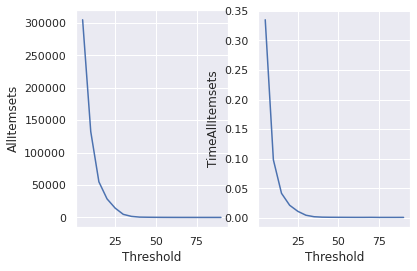

In [37]:
dfAFI = plotAllPatterns('zoo.bin')

In [0]:
def closedPatterns(d, minsupp):
    s = eclat(d, target='c', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ['Pattern', 'Freq']
        return True, df
    return False, _

In [0]:
def plotClosedPatterns(f):
    numberdata = []
    d, _ = leerDataset(f)
    k = int(len(d)/20)
    for i in range(k, len(d), k):
        start = time.time()
        r, t = closedPatterns(d, i)
        end = time.time()
        if r:
            numberdata += [(i, t.shape[0], end-start)]
    df = pd.DataFrame(numberdata)
    df.columns = ['Threshold', 'ClosedItemsets', 'TimeClosedItemsets']
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x='Threshold', y='ClosedItemsets', ax=ax[0], data=df)
    sns.lineplot(x='Threshold', y='TimeClosedItemsets', ax=ax[1], data=df)
    fig.show()
    return df


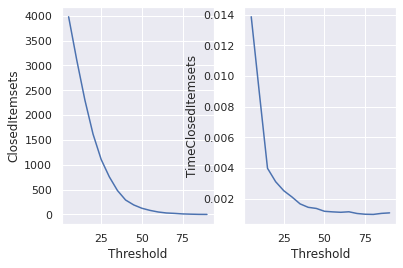

In [40]:
dfCFI = plotClosedPatterns('zoo.bin')

In [0]:
def maximalPatterns(d, minsupp):
    s = eclat(d, target='m', supp=minsupp)
    if len(s) > 0:
        df = pd.DataFrame(s)
        df.columns = ['Pattern', 'Freq']
        return True, df
    return False, _

In [0]:
def plotMaximalPatterns(f):
    numberdata = []
    d, _ = leerDataset(f)
    k = int(len(d)/20)
    for i in range(k, len(d), k):
        start = time.time()
        r, t = maximalPatterns(d, i)
        end = time.time()
        if r:
            numberdata += [(i, t.shape[0], end-start)]
    df = pd.DataFrame(numberdata)
    df.columns = ['Threshold', 'MaximalItemsets', 'TimeMaximalItemsets']
    fig, ax = plt.subplots(1, 2)
    sns.lineplot(x='Threshold', y='MaximalItemsets', ax=ax[0], data=df)
    sns.lineplot(x='Threshold', y='TimeMaximalItemsets', ax=ax[1], data=df)
    fig.show()
    return df

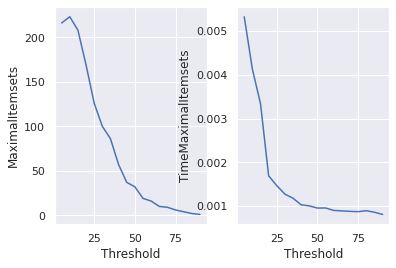

In [43]:
dfMFI = plotMaximalPatterns('zoo.bin')

In [44]:
dx = dfAFI.join(dfCFI.set_index('Threshold'), on='Threshold').join(dfMFI.set_index('Threshold'), on='Threshold')
print(dx)

    Threshold  AllItemsets  ...  MaximalItemsets  TimeMaximalItemsets
0           5       304723  ...              216             0.005330
1          10       132253  ...              223             0.004131
2          15        54888  ...              208             0.003340
3          20        28589  ...              169             0.001687
4          25        14305  ...              126             0.001462
5          30         4710  ...              100             0.001269
6          35         1600  ...               86             0.001174
7          40          488  ...               57             0.001024
8          45          288  ...               37             0.000999
9          50          168  ...               32             0.000949
10         55          102  ...               19             0.000952
11         60           59  ...               16             0.000896
12         65           31  ...               10             0.000885
13         70       